In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score


Nama : Leo Alfonso Tarigan 
NIM : 221402033


# Data Formatting


### 1. Importing Data

In [81]:
df = pd.read_csv('appstore_games.csv')

In [82]:
df

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17002,https://apps.apple.com/us/app/stack-puzzle-ris...,1474626442,Stack Puzzle : Rise Tower,"Blast the cubes, solve puzzle!",https://is5-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,"The goal is very simple, move the square horiz...",Zhigang Pei,4+,EN,64795648.0,Games,"Games, Entertainment, Casual, Strategy",30/07/2019,30/07/2019
17003,https://apps.apple.com/us/app/eachother/id1474...,1474919257,EachOther,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,Collect a score while you play!!\n\nBy linking...,Sultan Shindi,4+,EN,110341120.0,Games,"Games, Family, Strategy",1/08/2019,1/08/2019
17004,https://apps.apple.com/us/app/rabbit-vs-tortoi...,1474962324,Rabbit Vs Tortoise,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,"""Rabbit Vs Tortoise is chess type cool simple ...",Vishal Baldha,4+,EN,23207936.0,Games,"Games, Strategy",3/08/2019,3/08/2019
17005,https://apps.apple.com/us/app/fatall/id1474963671,1474963671,FaTaLL,Most fun game!!!,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,"9.99, 49.99, 3.99",Upgrade your character and use your skills to ...,Tayrem Games,4+,EN,196750336.0,Games,"Games, Strategy, Action",1/08/2019,1/08/2019


### 2. Checking Coloumn Type


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           17007 non-null  object 
 1   ID                            17007 non-null  int64  
 2   Name                          17007 non-null  object 
 3   Subtitle                      5261 non-null   object 
 4   Icon URL                      17007 non-null  object 
 5   Average User Rating           7561 non-null   float64
 6   User Rating Count             7561 non-null   float64
 7   Price                         16983 non-null  float64
 8   In-app Purchases              7683 non-null   object 
 9   Description                   17007 non-null  object 
 10  Developer                     17007 non-null  object 
 11  Age Rating                    17007 non-null  object 
 12  Languages                     16947 non-null  object 
 13  S

Terdapat banyak `missing value` di kolom subtitle, average user rating , user Rating count , in-App Purchases , dan languages


### 3. Check Duplicate Values

In [84]:
df.duplicated().sum()

160

In [85]:
df.drop_duplicates()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17002,https://apps.apple.com/us/app/stack-puzzle-ris...,1474626442,Stack Puzzle : Rise Tower,"Blast the cubes, solve puzzle!",https://is5-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,"The goal is very simple, move the square horiz...",Zhigang Pei,4+,EN,64795648.0,Games,"Games, Entertainment, Casual, Strategy",30/07/2019,30/07/2019
17003,https://apps.apple.com/us/app/eachother/id1474...,1474919257,EachOther,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,Collect a score while you play!!\n\nBy linking...,Sultan Shindi,4+,EN,110341120.0,Games,"Games, Family, Strategy",1/08/2019,1/08/2019
17004,https://apps.apple.com/us/app/rabbit-vs-tortoi...,1474962324,Rabbit Vs Tortoise,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,"""Rabbit Vs Tortoise is chess type cool simple ...",Vishal Baldha,4+,EN,23207936.0,Games,"Games, Strategy",3/08/2019,3/08/2019
17005,https://apps.apple.com/us/app/fatall/id1474963671,1474963671,FaTaLL,Most fun game!!!,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,"9.99, 49.99, 3.99",Upgrade your character and use your skills to ...,Tayrem Games,4+,EN,196750336.0,Games,"Games, Strategy, Action",1/08/2019,1/08/2019


### 4. Handling Missing Values


In [86]:
from sklearn.linear_model import LinearRegression

# Handling missing values for numerical columns (mean imputation, except 'Average User Rating')
numeric_cols = ['User Rating Count', 'Price', 'Size']
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

# Handling missing values for categorical columns (mode or custom labels)
categorical_cols = ['Subtitle', 'In-app Purchases', 'Languages']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0]) 

# column subtitle fill wih "unkwon"
df['Subtitle'] = df['Subtitle'].fillna('Unknown') 

# Handling missing values for date columns ( use last known date for missing value)
date_cols = ['Original Release Date', 'Current Version Release Date']
df[date_cols] = df[date_cols].ffill()

# linear regression for 'Average User Rating'
target = 'Average User Rating'
predictors = ['User Rating Count', 'Price', 'Size']

#  Split the data into training (with values) and test (missing values)
train_data = df[df[target].notnull()]
test_data = df[df[target].isnull()]

# Prepare the training set (drop rows with NaN in predictors)
X_train = train_data[predictors].dropna()
y_train = train_data.loc[X_train.index, target] 

# Prepare the test set (drop rows with NaN in predictors)
X_test = test_data[predictors].dropna()


# Train the model and fill missing values in 'Average User Rating'
if not X_train.empty and len(y_train) > 0 and not X_test.empty:
    # Train the regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict missing values
    predicted_values = model.predict(X_test)

    # Fill the missing values in the original DataFrame
    df.loc[df[target].isnull(), target] = predicted_values

# Save the cleaned dataset
cleaned_file_path = './appstore_games_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)

Data yang di clean disimpan dalam file baru agar tidak merusak data awal.

### 6.  Cek apakah tiap row sudah sesuai jumlahnya (tidak ada missing value)

In [87]:
df_clean = pd.read_csv("./appstore_games_cleaned.csv")

In [88]:
df_clean

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,Emoji Stickers,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.000000,3553.000000,2.99,0.99,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,Emoji Stickers,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.500000,284.000000,1.99,0.99,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,Emoji Stickers,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.000000,8376.000000,0.00,0.99,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),Emoji Stickers,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.500000,190394.000000,0.00,0.99,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,Emoji Stickers,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.500000,28.000000,2.99,0.99,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17002,https://apps.apple.com/us/app/stack-puzzle-ris...,1474626442,Stack Puzzle : Rise Tower,"Blast the cubes, solve puzzle!",https://is5-ssl.mzstatic.com/image/thumb/Purpl...,4.046864,3306.531279,0.00,0.99,"The goal is very simple, move the square horiz...",Zhigang Pei,4+,EN,64795648.0,Games,"Games, Entertainment, Casual, Strategy",30/07/2019,30/07/2019
17003,https://apps.apple.com/us/app/eachother/id1474...,1474919257,EachOther,Emoji Stickers,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.055206,3306.531279,0.00,0.99,Collect a score while you play!!\n\nBy linking...,Sultan Shindi,4+,EN,110341120.0,Games,"Games, Family, Strategy",1/08/2019,1/08/2019
17004,https://apps.apple.com/us/app/rabbit-vs-tortoi...,1474962324,Rabbit Vs Tortoise,Emoji Stickers,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.039247,3306.531279,0.00,0.99,"""Rabbit Vs Tortoise is chess type cool simple ...",Vishal Baldha,4+,EN,23207936.0,Games,"Games, Strategy",3/08/2019,3/08/2019
17005,https://apps.apple.com/us/app/fatall/id1474963671,1474963671,FaTaLL,Most fun game!!!,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,4.071033,3306.531279,0.00,"9.99, 49.99, 3.99",Upgrade your character and use your skills to ...,Tayrem Games,4+,EN,196750336.0,Games,"Games, Strategy, Action",1/08/2019,1/08/2019


In [89]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           17007 non-null  object 
 1   ID                            17007 non-null  int64  
 2   Name                          17007 non-null  object 
 3   Subtitle                      17007 non-null  object 
 4   Icon URL                      17007 non-null  object 
 5   Average User Rating           17007 non-null  float64
 6   User Rating Count             17007 non-null  float64
 7   Price                         17007 non-null  float64
 8   In-app Purchases              17007 non-null  object 
 9   Description                   17007 non-null  object 
 10  Developer                     17007 non-null  object 
 11  Age Rating                    17007 non-null  object 
 12  Languages                     17007 non-null  object 
 13  S

<Axes: xlabel='Average User Rating', ylabel='Count'>

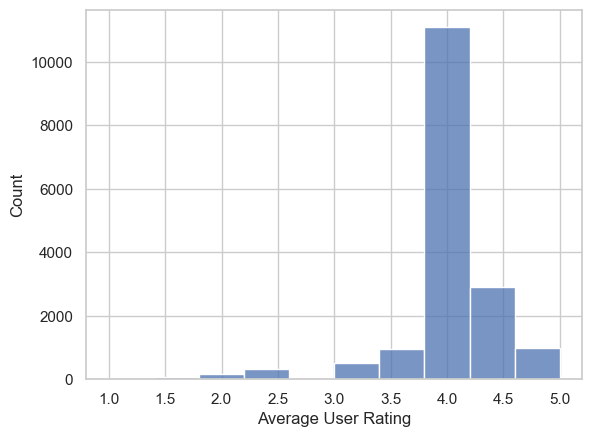

In [90]:
sns.histplot(data = df_clean['Average User Rating'], bins=10)

 Data sudah berhasil di clean

### Exploratory Data Analysis and Visualization 

<Figure size 1200x600 with 0 Axes>

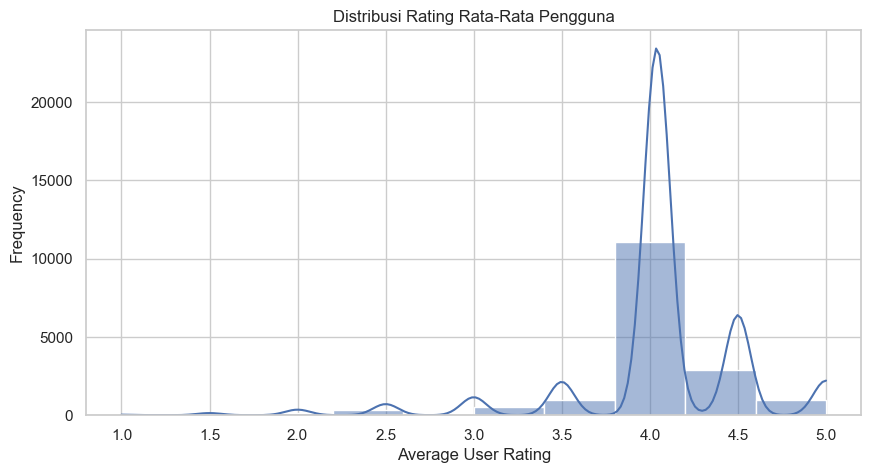

In [91]:
data_clean = df_clean
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Pertanyaan 1: Bagaimana distribusi rating rata-rata pengguna?
plt.figure(figsize=(10, 5))
sns.histplot(data_clean['Average User Rating'].dropna(), bins=10, kde=True)
plt.title("Distribusi Rating Rata-Rata Pengguna")
plt.xlabel("Average User Rating")
plt.ylabel("Frequency")
plt.show()



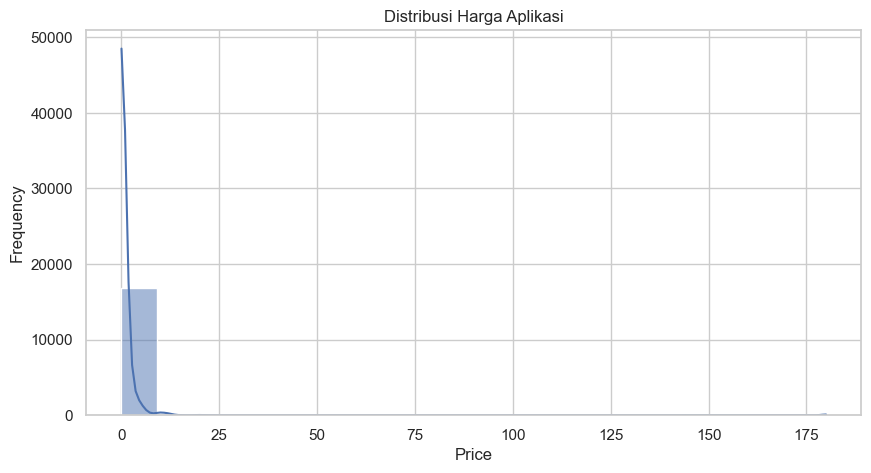

In [92]:
# Bagaimana distribusi harga aplikasi game? Apakah lebih banyak yang berbayar atau gratis?
plt.figure(figsize=(10, 5))
sns.histplot(data_clean['Price'], bins=20, kde=True)
plt.title("Distribusi Harga Aplikasi")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


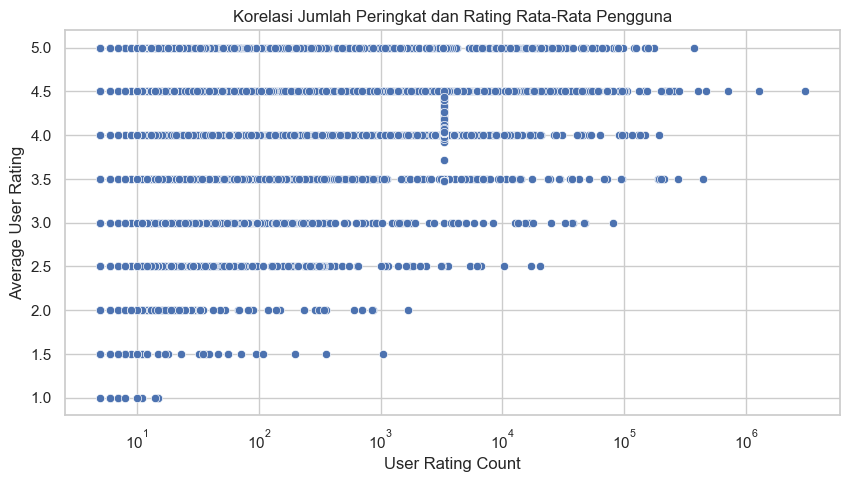

In [93]:
# Pertanyaan 3: Apakah ada korelasi antara jumlah peringkat dengan rating rata-rata?
plt.figure(figsize=(10, 5))
sns.scatterplot(x='User Rating Count', y='Average User Rating', data=data_clean)
plt.title("Korelasi Jumlah Peringkat dan Rating Rata-Rata Pengguna")
plt.xlabel("User Rating Count")
plt.ylabel("Average User Rating")
plt.xscale("log") 
plt.show()

### Data Preprocessing

In [94]:
# Menambah kolom target untuk prediksi: High_Rating (rating >= 4)
data_clean['High_Rating'] = (data_clean['Average User Rating'] >= 4).astype(int)  # New target column

# Memilih fitur yang relevan untuk pemodelan
X = data_clean[['Price', 'User Rating Count']]
y = data_clean['High_Rating']

# Memisahkan data ke dalam train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Building

In [95]:
# Menggunakan Random Forest
dct = DecisionTreeRegressor()
dct.fit(X_train, y_train)

DecisionTreeRegressor()

In [96]:
# Prediksi pake data Test
y_pred = dct.predict(X_test)

In [97]:
# Evaluation

# RMSE
reg_rmse = np.sqrt(mse(y_test, y_pred))

# MAE
reg_mae = mae(y_test, y_pred)

# r2 score
reg_r2 = r2_score(y_test, y_pred)

print("Evaluasi model Decision Tree:")
print("RMSE:", reg_rmse)
print("MAE:", reg_mae)
print("R2:", reg_r2)

Evaluasi model Decision Tree:
RMSE: 0.32306040626542243
MAE: 0.1609040763877975
R2: -0.032906748148815224
